In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.neighbors import KernelDensity
import seaborn as sns
from scipy.stats import norm

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [2]:
df = pd.read_csv('/content/insurance_data.csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

In [3]:
# code here
df['age'].mean()

38.07865168539326

(array([113., 123., 160., 156., 146., 179., 156., 127.,  76.,  99.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

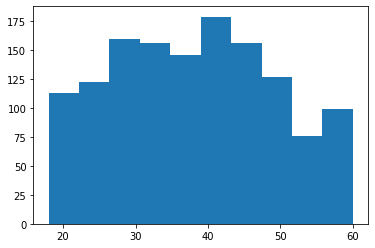

In [4]:
plt.hist(df['age'],bins = 10)

<Axes: xlabel='age', ylabel='Count'>

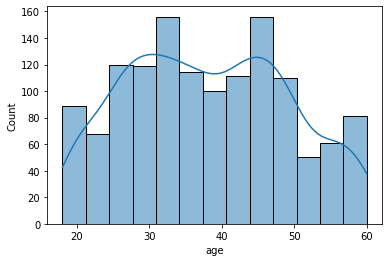

In [5]:
sns.histplot(df['age'],kde = True)

<Axes: xlabel='age', ylabel='Density'>

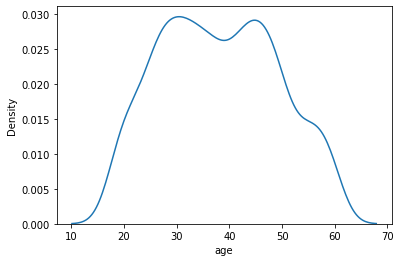

In [21]:
sns.kdeplot(data=df, x='age')

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [24]:
# answer here
df_bmi= df[df['bmi']>30]
df_bmi

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [25]:
probability = len(df_bmi)/len(df)

In [26]:
probability

0.5216417910447761

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Density'>

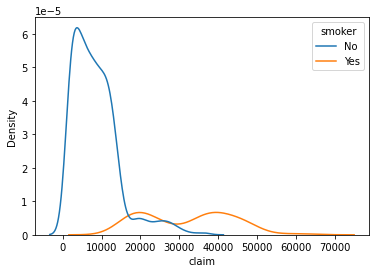

In [7]:
# code here
sns.kdeplot(data =df,x = 'claim', hue ='smoker')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

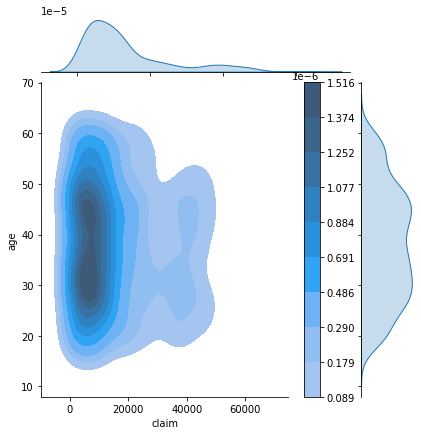

In [32]:
from matplotlib.figure import cbar
# code here
sns.jointplot(data=df, x='claim', y ='age',kind='kde',fill=True, cbar=True)

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

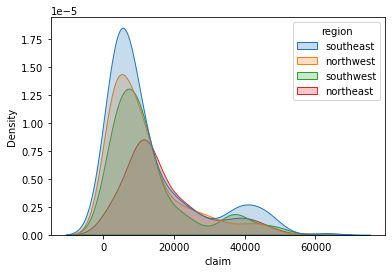

In [35]:
# code here
sns.kdeplot(data=df,x='claim',hue='region',fill =True)

### Q6: Plot PDF and CDF of claim in insurance data

<Axes: xlabel='claim', ylabel='Density'>

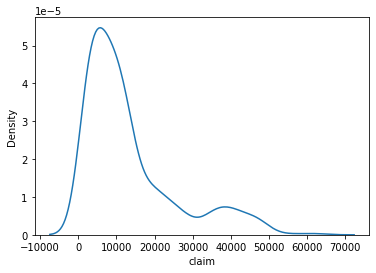

In [36]:
# code here
sns.kdeplot(df['claim'])

<Axes: xlabel='claim', ylabel='Proportion'>

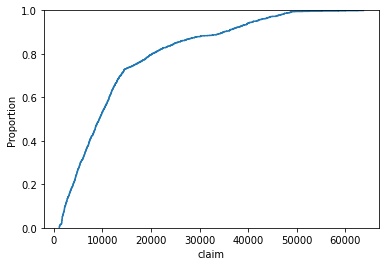

In [37]:
sns.ecdfplot(data=df,x='claim')

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5. 

Probability of X > 0.5: 0.00


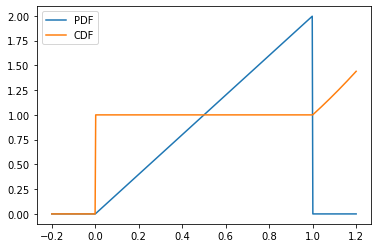

In [42]:
# code here
def pdf(x):
  if 0 <= x <= 1:
    return 2*x
  else:
    return 0

def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return 1
    else:
        return  x**2
x = np.linspace(-0.2, 1.2, 500)
y_pdf = [pdf(xi) for xi in x]
y_cdf = [cdf(xi) for xi in x]
plt.plot(x, y_pdf, label='PDF')
plt.plot(x, y_cdf, label='CDF')
plt.legend() 
p_gt_05 = 1 - cdf(0.5)
print(f"Probability of X > 0.5: {p_gt_05:.2f}")

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

In [12]:
# answer here

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

In [13]:
# answer here